<a href="https://colab.research.google.com/github/AndrewCapstoneProject2025/CapstoneProject2025/blob/main/Hands_on_Lab_6_Finding_Duplicates_v2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


In [3]:
import pandas as pd

# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [ ]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [ ]:
import pandas as pd


Import matplotlib


In [ ]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [ ]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [1]:
# 1. Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# 2. Display the first few duplicate rows
duplicate_rows = df[df.duplicated(keep=False)] # keep=False marks all duplicates as True
print("\nFirst few duplicate rows:")
display(duplicate_rows.head())

NameError: name 'df' is not defined

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [4]:
# Identify duplicate rows based on selected columns
selected_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_subset = df[df.duplicated(subset=selected_columns, keep=False)]

print(f"\nNumber of duplicate rows based on {selected_columns}: {duplicate_subset.shape[0]}")
print("\nFirst few duplicate rows based on selected columns:")
display(duplicate_subset.head())

# Analyze which columns frequently contain identical values within these duplicate rows
# We can look at the value counts for each of the selected columns in the duplicate subset
for col in selected_columns:
    print(f"\nValue counts for '{col}' in duplicate subset:")
    print(duplicate_subset[col].value_counts())


Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65290

First few duplicate rows based on selected columns:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN



Value counts for 'MainBranch' in duplicate subset:
MainBranch
I am a developer by profession                                                           50173
I am not primarily a developer, but I write code sometimes as part of my work/studies     6471
I am learning to code                                                                     3847
I code primarily as a hobby                                                               3317
I used to be a developer by profession, but no longer am                                  1482
Name: count, dtype: int64

Value counts for 'Employment' in duplicate subset:
Employment
Employed, full-time                                                                                                                                                       39048
Independent contractor, freelancer, or self-employed                                                                                                                       4845
Student, full-time   

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


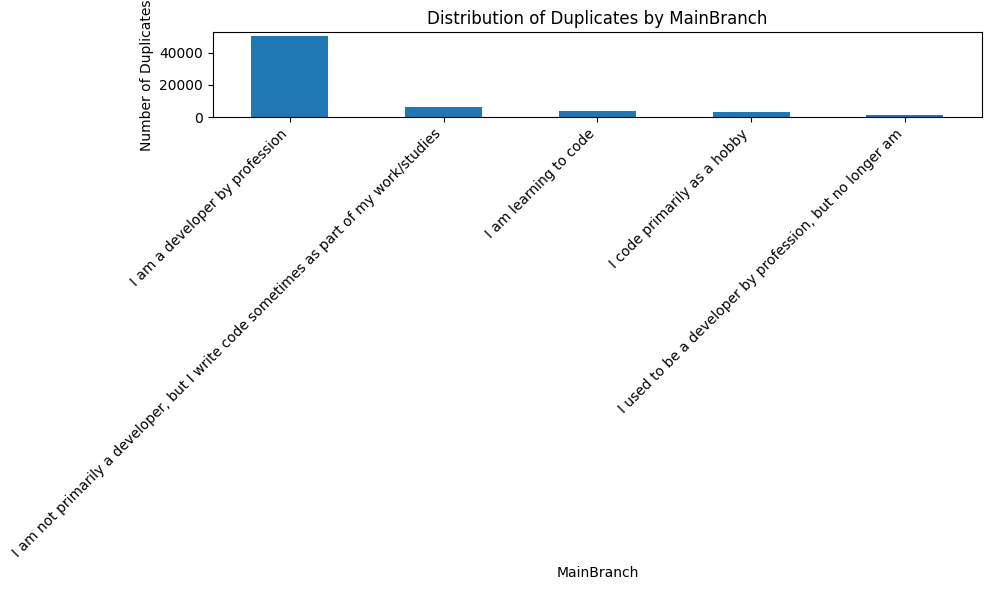

/tmp/ipython-input-3390915318.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


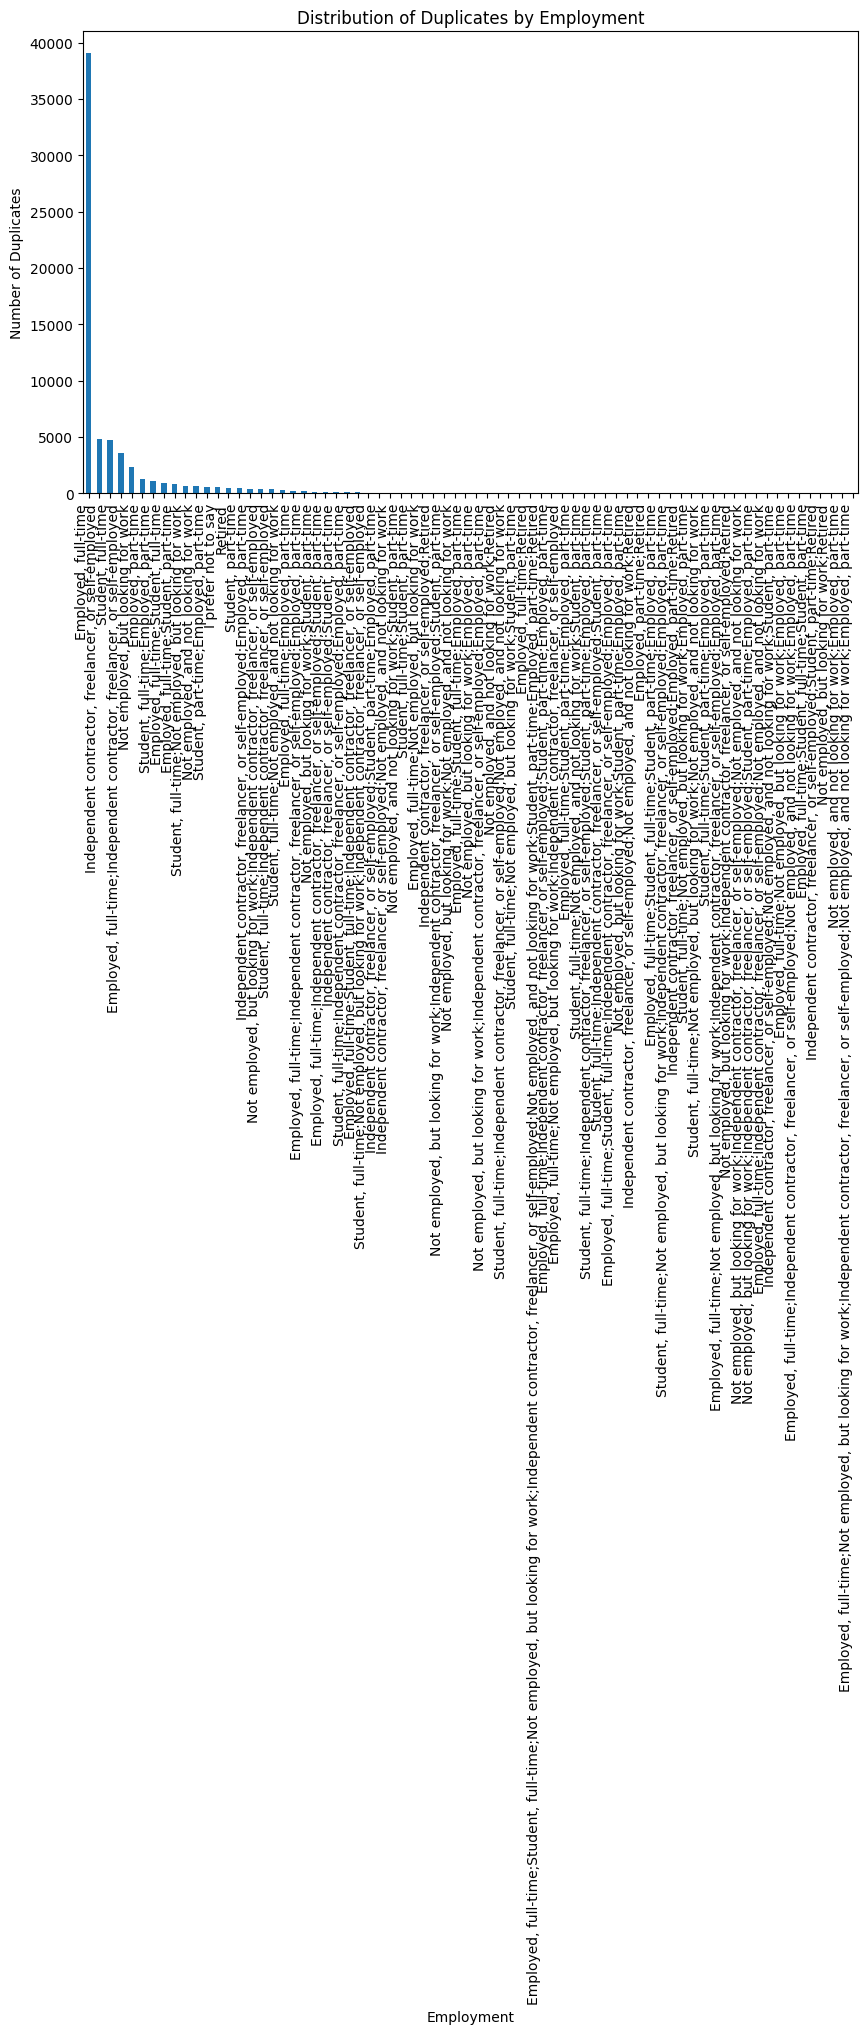

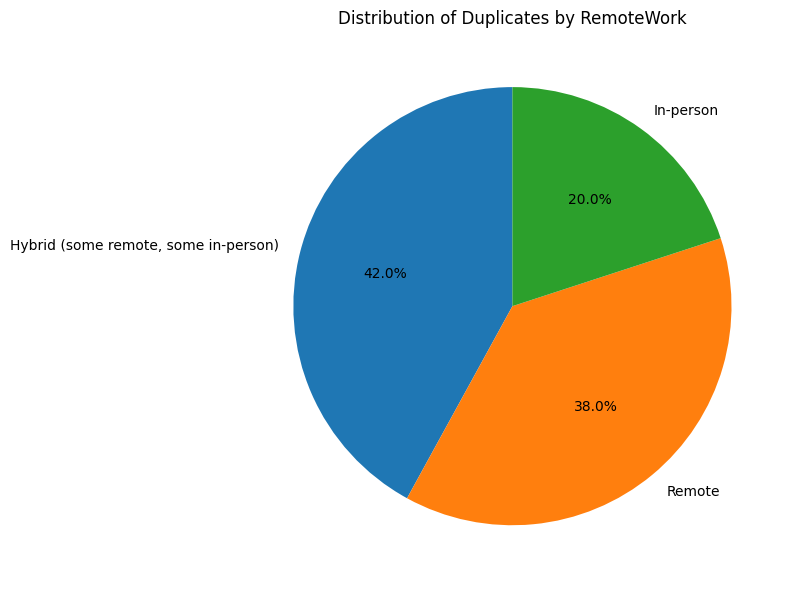

In [6]:
import matplotlib.pyplot as plt

# 1. Create visualizations to show the distribution of duplicates across different categories.
# We'll use the 'duplicate_subset' dataframe created in the previous step, which contains
# rows that are duplicates based on the selected columns.

# Distribution of duplicates by MainBranch
plt.figure(figsize=(10, 6))
duplicate_subset['MainBranch'].value_counts().plot(kind='bar')
plt.title('Distribution of Duplicates by MainBranch')
plt.xlabel('MainBranch')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of duplicates by Employment
plt.figure(figsize=(10, 6))
duplicate_subset['Employment'].value_counts().plot(kind='bar')
plt.title('Distribution of Duplicates by Employment')
plt.xlabel('Employment')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Distribution of duplicates by RemoteWork
plt.figure(figsize=(8, 6))
duplicate_subset['RemoteWork'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Duplicates by RemoteWork')
plt.ylabel('') # Hide the y-label for a pie chart
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [7]:
# Decide which columns are critical for defining uniqueness
# Based on the analysis in Task 2, 'MainBranch', 'Employment', and 'RemoteWork'
# are columns where duplicates frequently occur. However, ResponseId is the unique
# identifier for each response, so we should consider keeping the first instance
# of each set of duplicates based on ResponseId.

# Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.
# Since ResponseId is a unique identifier, removing duplicates based on the entire row
# is appropriate to ensure each survey response is represented only once.
# We will keep the first occurrence of each duplicate row.
df_cleaned = df.drop_duplicates(keep='first')

print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")
print(f"Number of removed rows: {df.shape[0] - df_cleaned.shape[0]}")

Original number of rows: 65457
Number of rows after removing duplicates: 65437
Number of removed rows: 20


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


## Reasoning for Selecting Specific Columns

For identifying duplicates, we initially looked at the entire row to find exact duplicates. This is a good starting point to see if there are any completely identical entries in the dataset.

However, we also analyzed duplicates based on a subset of columns: 'MainBranch', 'Employment', and 'RemoteWork'. The reasoning for selecting these columns is:

*   **'MainBranch'**: This column indicates the primary role of the respondent (e.g., developer, student, hobbyist). It is a fundamental characteristic that helps categorize the survey participants.
*   **'Employment'**: This column describes the employment status of the respondent (e.g., full-time, part-time, freelancer). This is another key attribute that defines the respondent's current situation.
*   **'RemoteWork'**: This column specifies the respondent's remote work arrangement (e.g., remote, in-person, hybrid). In the context of a developer survey, this is a significant factor that can influence various other responses.

By examining duplicates based on these columns, we could see if there were multiple entries for individuals with the same main branch, employment status, and remote work arrangement. This analysis helped us understand the nature of the duplicates beyond just exact row matches.

For removing duplicates, we decided to remove duplicates based on the entire row while keeping the first occurrence (`keep='first'`). The primary reasoning for this is that the 'ResponseId' column is a unique identifier for each survey response. If entire rows are duplicated, it indicates an issue where the same response has been recorded multiple times. Removing these full-row duplicates ensures that each unique survey response, as identified by its 'ResponseId', is represented only once in the cleaned dataset. While analyzing duplicates based on a subset of columns like 'MainBranch', 'Employment', and 'RemoteWork' is useful for understanding patterns, using the entire row with the unique 'ResponseId' as the basis for removal is the most appropriate strategy to maintain data integrity and ensure each distinct survey entry is preserved.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
